In [ ]:
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv

# Setup
driver = webdriver.Chrome()
driver.get("https://www.bi.go.id/hargapangan")
wait = WebDriverWait(driver, 20)
driver.execute_script("window.scrollBy(0, 300)")

# Siapkan list untuk menyimpan data CSV
data_csv = [("Tanggal", "Rata-rata Harga")]

# ================================
# Loop untuk tahun 2022 sampai 2025
# ================================
for year in range(2022, 2026):
    for month in range(1, 13):
        if year == 2025 and month > 4:
            continue  # Batasi hanya sampai April 2025

        for day in range(1, 32):
            try:
                tanggal_str = f"{year}/{month:02d}/{day:02d}"

                # ================================
                # 1. Klik ikon kalender
                # ================================
                ikon_kalender = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "#dboDate .dx-dropdowneditor-button")))
                ikon_kalender.click()
                print("\n📅 Klik ikon kalender")

                # ================================
                # 2. Tunggu popup kalender
                # ================================
                wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'table[aria-label="Calendar"]')))
                print("📅 Popup kalender muncul")

                # ================================
                # 3. Navigasi ke tahun target
                # ================================
                # Klik caption dua kali agar masuk ke view tahun
                caption_button = wait.until(EC.element_to_be_clickable((By.CLASS_NAME, "dx-calendar-caption-button")))
                caption_button.click()
                time.sleep(0.2)
                caption_button.click()
                time.sleep(0.2)

                # Loop cari dan klik tahun yang sesuai
                while True:
                    tahun_elemen = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "td.dx-calendar-cell")))
                    tahun_ditemukan = False
                    for el in tahun_elemen:
                        if el.text.strip() == str(year):
                            el.click()
                            tahun_ditemukan = True
                            time.sleep(0.3)
                            break
                    if tahun_ditemukan:
                        break
                    else:
                        # scroll ke tahun berikutnya (karena mulai dari 2022 ke 2025)
                        panah_kanan = driver.find_element(By.CSS_SELECTOR, "a.dx-calendar-navigator-next-view")
                        panah_kanan.click()
                        time.sleep(0.3)

                # ================================
                # 4. Pilih bulan
                # ================================
                bulan_elements = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "td.dx-calendar-cell")))
                bulan_klik = False
                for b in bulan_elements:
                    if b.get_attribute("data-value") == f"{year}/{month:02d}/01":
                        b.click()
                        bulan_klik = True
                        time.sleep(0.3)
                        break
                if not bulan_klik:
                    print(f"❌ Bulan {month} {year} tidak ditemukan")
                    continue

                # ================================
                # 5. Pilih tanggal target
                # ================================
                tanggal_klik = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "td.dx-calendar-cell")))
                tanggal_dipilih = False
                for el in tanggal_klik:
                    if el.get_attribute("data-value") == tanggal_str:
                        driver.execute_script("arguments[0].scrollIntoView(true);", el)
                        time.sleep(0.2)
                        driver.execute_script("arguments[0].click();", el)
                        print(f"✅ Tanggal {tanggal_str} dipilih")
                        tanggal_dipilih = True
                        break

                if not tanggal_dipilih:
                    print(f"❌ Tanggal {tanggal_str} tidak ditemukan")
                    continue

                # ================================
                # 6. Klik tombol panah
                # ================================
                try:
                    tombol_panah = wait.until(EC.element_to_be_clickable((By.ID, "devextreme11")))
                    tombol_panah.click()
                    print("➡️ Tombol panah diklik")
                except Exception as e:
                    print(f"❌ Gagal klik tombol panah: {e}")
                    continue

                # ================================
                # 7. Ambil data & hitung rata-rata nasional
                # ================================
                try:
                    scrollable = driver.find_element(By.CSS_SELECTOR, ".dx-scrollable-container")
                    driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", scrollable)
                    time.sleep(1)

                    rows = driver.find_elements(By.CSS_SELECTOR, "table.dx-datagrid-table tbody tr")
                    daftar_harga = []

                    for row in rows:
                        try:
                            kolom = row.find_elements(By.TAG_NAME, "td")
                            if len(kolom) >= 2:
                                harga_text = kolom[1].text.strip()
                                harga_angka = int(harga_text.replace("Rp", "").replace(".", "").strip())
                                daftar_harga.append(harga_angka)
                        except:
                            continue

                    if daftar_harga:
                        rata2 = sum(daftar_harga) / len(daftar_harga)
                        harga_format = f"Rp {round(rata2):,}".replace(",", ".")
                        print(f"📈 Rata-rata nasional tanggal {tanggal_str}: {harga_format}")
                        data_csv.append((tanggal_str, harga_format))
                    else:
                        print(f"❌ Tidak ada data harga untuk tanggal {tanggal_str}")

                except Exception as e:
                    print(f"❌ Gagal mengambil data harga: {e}")

            except Exception as e:
                print(f"⚠️ Gagal proses untuk tanggal {tanggal_str}: {e}")

            time.sleep(2)  # jeda antar tanggal biar stabil

# Simpan ke file CSV
with open("rata_rata_harga_april_2025.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerows(data_csv)
    print("📁 Data rata-rata harga berhasil disimpan ke 'rata_rata_harga.csv'")

# Tutup browser setelah selesai
driver.quit()



📅 Klik ikon kalender
📅 Popup kalender muncul
✅ Tanggal 2022/01/01 dipilih
➡️ Tombol panah diklik
📈 Rata-rata nasional tanggal 2022/01/01: Rp 13.209

📅 Klik ikon kalender
📅 Popup kalender muncul
✅ Tanggal 2022/01/02 dipilih
➡️ Tombol panah diklik
📈 Rata-rata nasional tanggal 2022/01/02: Rp 13.209

📅 Klik ikon kalender
📅 Popup kalender muncul
✅ Tanggal 2022/01/03 dipilih
➡️ Tombol panah diklik
📈 Rata-rata nasional tanggal 2022/01/03: Rp 13.205

📅 Klik ikon kalender
📅 Popup kalender muncul
✅ Tanggal 2022/01/04 dipilih
➡️ Tombol panah diklik
📈 Rata-rata nasional tanggal 2022/01/04: Rp 13.205

📅 Klik ikon kalender
📅 Popup kalender muncul
✅ Tanggal 2022/01/05 dipilih
➡️ Tombol panah diklik
📈 Rata-rata nasional tanggal 2022/01/05: Rp 13.145

📅 Klik ikon kalender
📅 Popup kalender muncul
✅ Tanggal 2022/01/06 dipilih
➡️ Tombol panah diklik
📈 Rata-rata nasional tanggal 2022/01/06: Rp 13.150

📅 Klik ikon kalender
📅 Popup kalender muncul
✅ Tanggal 2022/01/07 dipilih
➡️ Tombol panah diklik
📈 Rata-r

https://www.bi.go.id/hargapangan

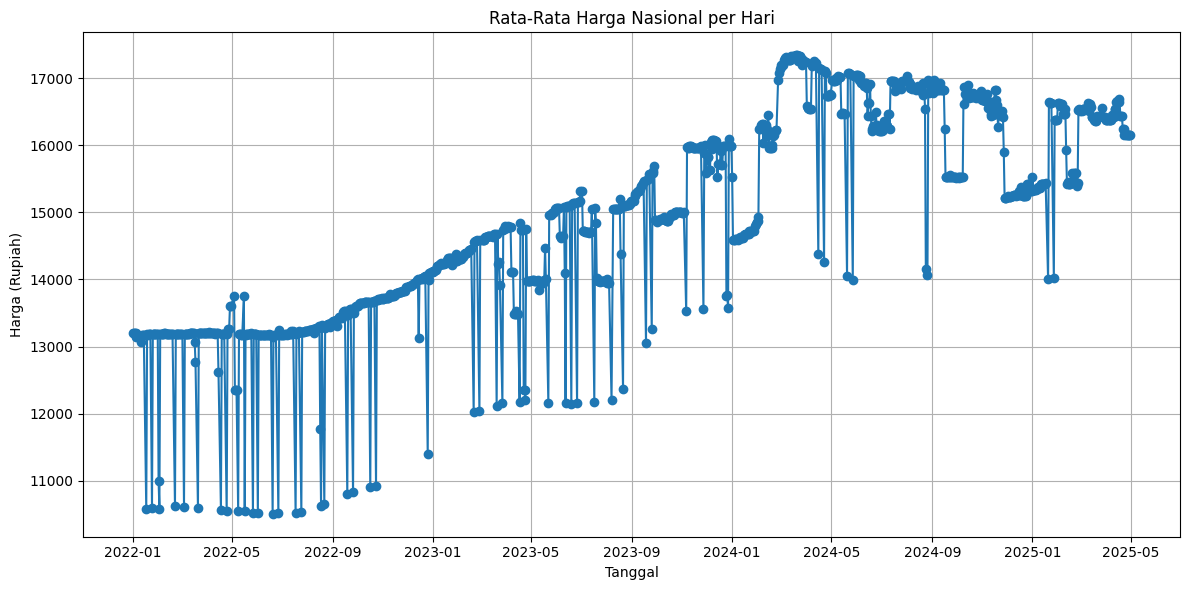

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv("rata_rata_harga_april_2025.csv")

# Bersihkan kolom harga
df["Rata-rata Harga"] = df["Rata-rata Harga"].str.replace("Rp", "").str.replace(".", "").str.strip()
df["Rata-rata Harga"] = df["Rata-rata Harga"].astype(float)

# Konversi kolom tanggal
df["Tanggal"] = pd.to_datetime(df["Tanggal"], format="%Y/%m/%d")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df["Tanggal"], df["Rata-rata Harga"], marker='o')
plt.title("Rata-Rata Harga Nasional per Hari")
plt.xlabel("Tanggal")
plt.ylabel("Harga (Rupiah)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
df

,Tanggal,Rata-rata Harga
0,2022-01-01,13209.0
1,2022-01-02,13209.0
2,2022-01-03,13205.0
3,2022-01-04,13205.0
4,2022-01-05,13145.0
...,...,...
1115,2025-04-26,16159.0
1116,2025-04-27,16159.0
1117,2025-04-28,16150.0
1118,2025-04-29,16155.0


In [4]:
df.shape

(1120, 2)

In [5]:
df.isna().sum()

Tanggal            0
Rata-rata Harga    0
dtype: int64